In [1]:
import torch 

from torchfem import Truss
from torchfem.io import export_mesh

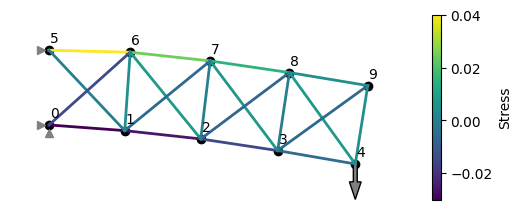

In [2]:
n1 = torch.linspace(0.0, 4.0, 5)
n2 = torch.linspace(0.0, 1.0, 2)
n1, n2 = torch.stack(torch.meshgrid(n1, n2, indexing="xy"))
nodes = torch.stack([n1.ravel(), n2.ravel()], dim=1)

elements = [
    [0, 1],
    [1, 2],
    [2, 3],
    [3, 4],
    [5, 6],
    [6, 7],
    [7, 8],
    [8, 9],
    [1, 5],
    [0, 6],
    [2, 6],
    [1, 7],
    [3, 7],
    [2, 8],
    [4, 8],
    [3, 9],
    [1, 6],
    [2, 7],
    [3, 8],
    [4, 9],
]

forces = torch.zeros_like(nodes)
forces[4, 1] = -0.01
constraints = torch.zeros_like(nodes, dtype=bool)
constraints[0, 0] = True
constraints[0, 1] = True
constraints[5, 0] = True
areas = torch.ones((len(elements)))
moduli = torch.ones((len(elements)))

truss_sample = Truss(nodes, elements, forces, constraints, areas, moduli)
u, f, sigma = truss_sample.solve()
truss_sample.plot2d(u=u, sigma=sigma)

In [3]:
n1 = torch.linspace(0.0, 10.0, 2)
n2 = torch.linspace(0.0, 10.0, 2)
n3 = torch.linspace(0.0, 10.0, 2)
n1, n2, n3 = torch.stack(torch.meshgrid(n1, n2, n3, indexing="xy"))
nodes = torch.stack([n1.ravel(), n2.ravel(), n3.ravel()], dim=1)


elements = []
for i in range(nodes.shape[0]):
    for j in range(i):
        if i != j:
            elements.append([i,j])


forces = torch.zeros_like(nodes)
forces[2, 1] = -0.01
forces[3, 1] = -0.01
constraints = torch.zeros_like(nodes, dtype=bool)
constraints[0, :] = True
constraints[1, :] = True
constraints[4, :] = True
constraints[5, :] = True
areas = torch.ones((len(elements)))
moduli = torch.ones((len(elements)))

truss3d = Truss(nodes, elements, forces, constraints, areas, moduli)
u, f, sigma = truss3d.solve()
truss3d.plot3d(u=u, sigma=sigma)

Widget(value="<iframe src='http://localhost:54111/index.html?ui=P_0x14df83f10_0&reconnect=auto' style='width: …